In [12]:
get_ipython().magic(u'matplotlib notebook')

import scipy.io as spio
from scipy.signal import firwin,freqz,filtfilt
from scipy.fftpack import fft,fftfreq
import numpy as np
from matplotlib import pyplot as plt
import math
import matplotlib as mpl
import csv
from pykalman import KalmanFilter
from jupyterthemes import jtplot
jtplot.style()
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['agg.path.chunksize'] = 10000

# Gesture Recognition Of An Arm Using A 9-DOF Inertial Measurement Unit
<br>
<center>Shanmugam Muruga Palaniappan</center>

 <center>![](images/orthotic1.png)</center> 
 

 <center>![](images/orthotic2.png)</center> 
 

In [39]:
n_timesteps = 150
t = np.linspace(0, 1, n_timesteps)

data = []
dataOI = []
dataUD = []

for i in range (1,81):
    data.append(np.genfromtxt('OI/OI'+str(i)+'.csv', dtype=float, delimiter=','))
    dataOI.append(np.genfromtxt('OI/OI'+str(i)+'.csv', dtype=float, delimiter=','))

for i in range (1,81):
    data.append(np.genfromtxt('UD/UD'+str(i)+'.csv', dtype=float, delimiter=','))
    dataUD.append(np.genfromtxt('UD/UD'+str(i)+'.csv', dtype=float, delimiter=','))

sensors = {'Accelx':0,'Accely':1,'Accelz':2,'Magnetx':3,'Magnety':4,'Magnetz':5,'Gyrox':6,'Gyroy':7,'Gyroz':8}
sensorLabel = ['Accelx, G','Accely, G','Accelz, G','Magnetx, Gauss','Magnety, Gauss','Magnetz, Gauss','Gyrox, rad/s','Gyroy, rad/s','Gyroz, rad/s']

data = np.array(data)
dataOI = np.array(dataOI)
dataUD = np.array(dataUD)
dataOI = dataOI.astype(float)
dataUD = dataUD.astype(float)

In [14]:
def f(x):
    return x
def pltsensor(f):
    plt.close()
    plt.plot(t, data[0,:,f]);
    plt.ylabel(sensorLabel[f])
    plt.xlabel('Time, seconds')
    plt.show()

In [15]:
interact(pltsensor,f=sensors)

interactive(children=(Dropdown(description=u'f', options={'Accelz': 2, 'Accelx': 0, 'Accely': 1, 'Gyroz': 8, 'Gyrox': 6, 'Gyroy': 7, 'Magnety': 4, 'Magnetx': 3, 'Magnetz': 5}, value=2), Output()), _dom_classes=('widget-interact',))

<function __main__.pltsensor>

In [40]:
data = np.delete(data,[0,1,2,5,7,9,10,11], 2)
dataOI = np.delete(dataOI,[0,1,2,5,7,9,10,11], 2)
dataUD = np.delete(dataUD,[0,1,2,5,7,9,10,11], 2)
#update labels
sensors = {'Magnetx':0,'Magnety':1,'Gyrox':2,'Gyroz':3}
sensorLabel = ['Magnetx, Gauss','Magnety, Gauss','Gyrox, rad/s','Gyroz, rad/s']


In [46]:
def kalman(f):
    plt.close()
    kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),transition_covariance=0.01 * np.eye(2))
    observations = dataUD[0][:,f]
    states_pred = kf.em(observations).smooth(observations)[0]
    obs_scatter = plt.scatter(t, observations, marker='x', color='b',
                             label='observations')
    position_line = plt.plot(t, states_pred[:, 0],
                            linestyle='-', marker='o', color='r',
                            label='position est.')
    plt.legend()


In [47]:
interact(kalman,f=sensors)

interactive(children=(Dropdown(description=u'f', options={'Gyroz': 3, 'Gyrox': 2, 'Magnety': 1, 'Magnetx': 0}, value=3), Output()), _dom_classes=('widget-interact',))

<function __main__.kalman>

In [22]:
dataflat = data.reshape(len(data),150*data.shape[2])
dataflat = dataflat.astype(float)

dataflatmat = np.matrix(dataflat)

cov = (1.0/(150*data.shape[2]))*(dataflatmat.T*dataflatmat)


<IPython.core.display.Javascript object>


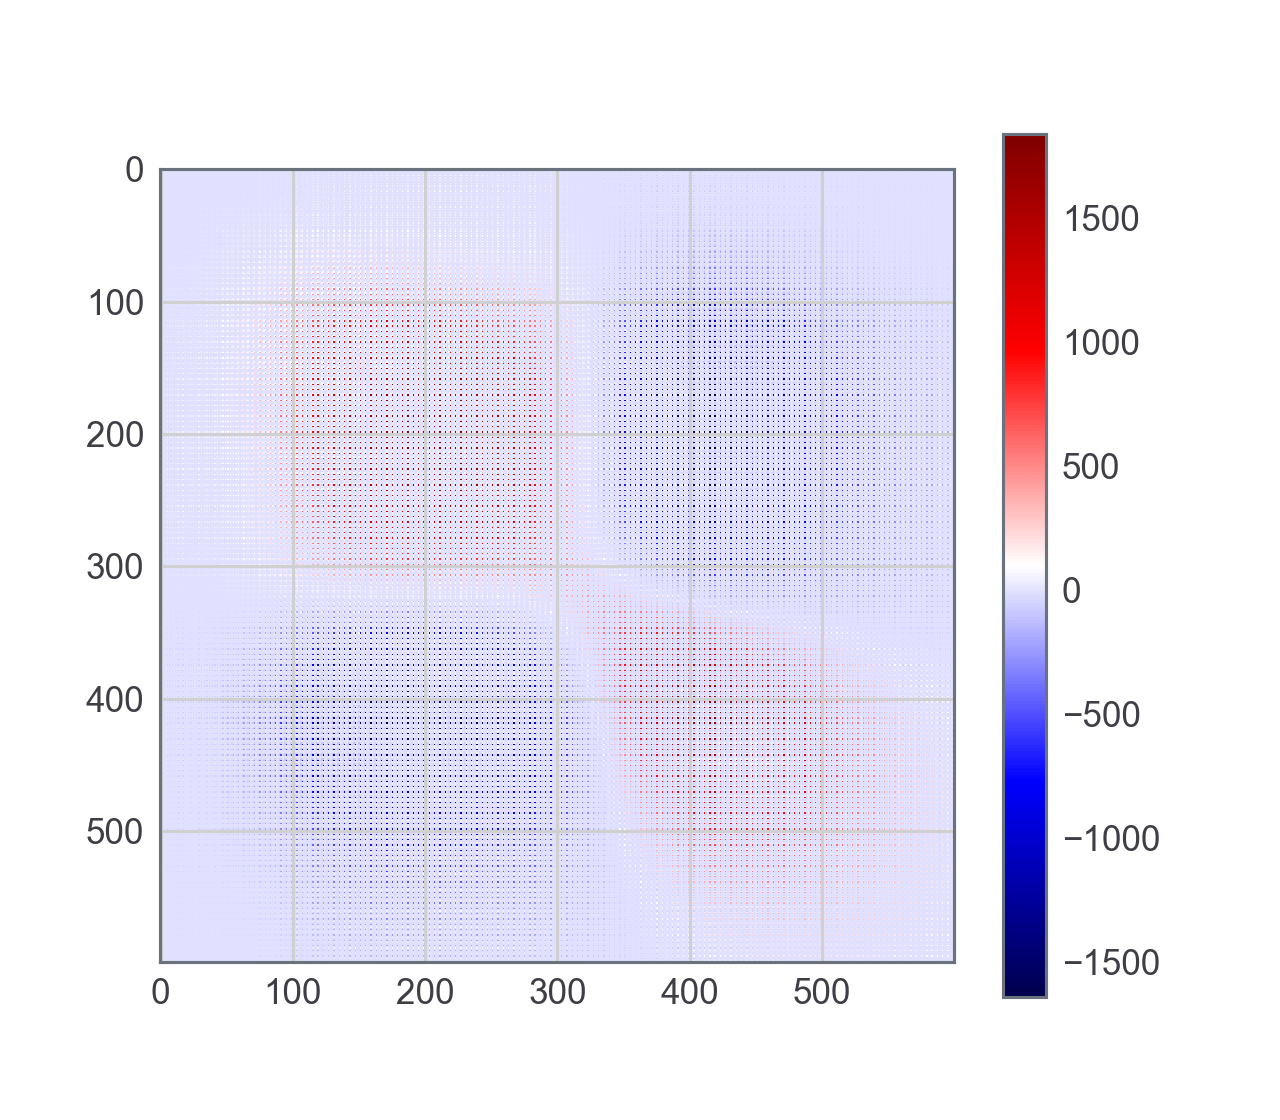

In [23]:
plt.close()
plt.imshow(cov, cmap='seismic', interpolation='nearest');
plt.colorbar();

In [19]:
w,v = np.linalg.eig(cov)
sortedw =np.sort(w)
max1 = sortedw[len(sortedw)-1] #eigenvector corresponding to the largest eigenvalue
max2 = sortedw[len(sortedw)-2] #eigenvector corresponding to the second largest eigenvalue


vec1 = (v[:,0])
vec2 = (v[:,1])

<IPython.core.display.Javascript object>


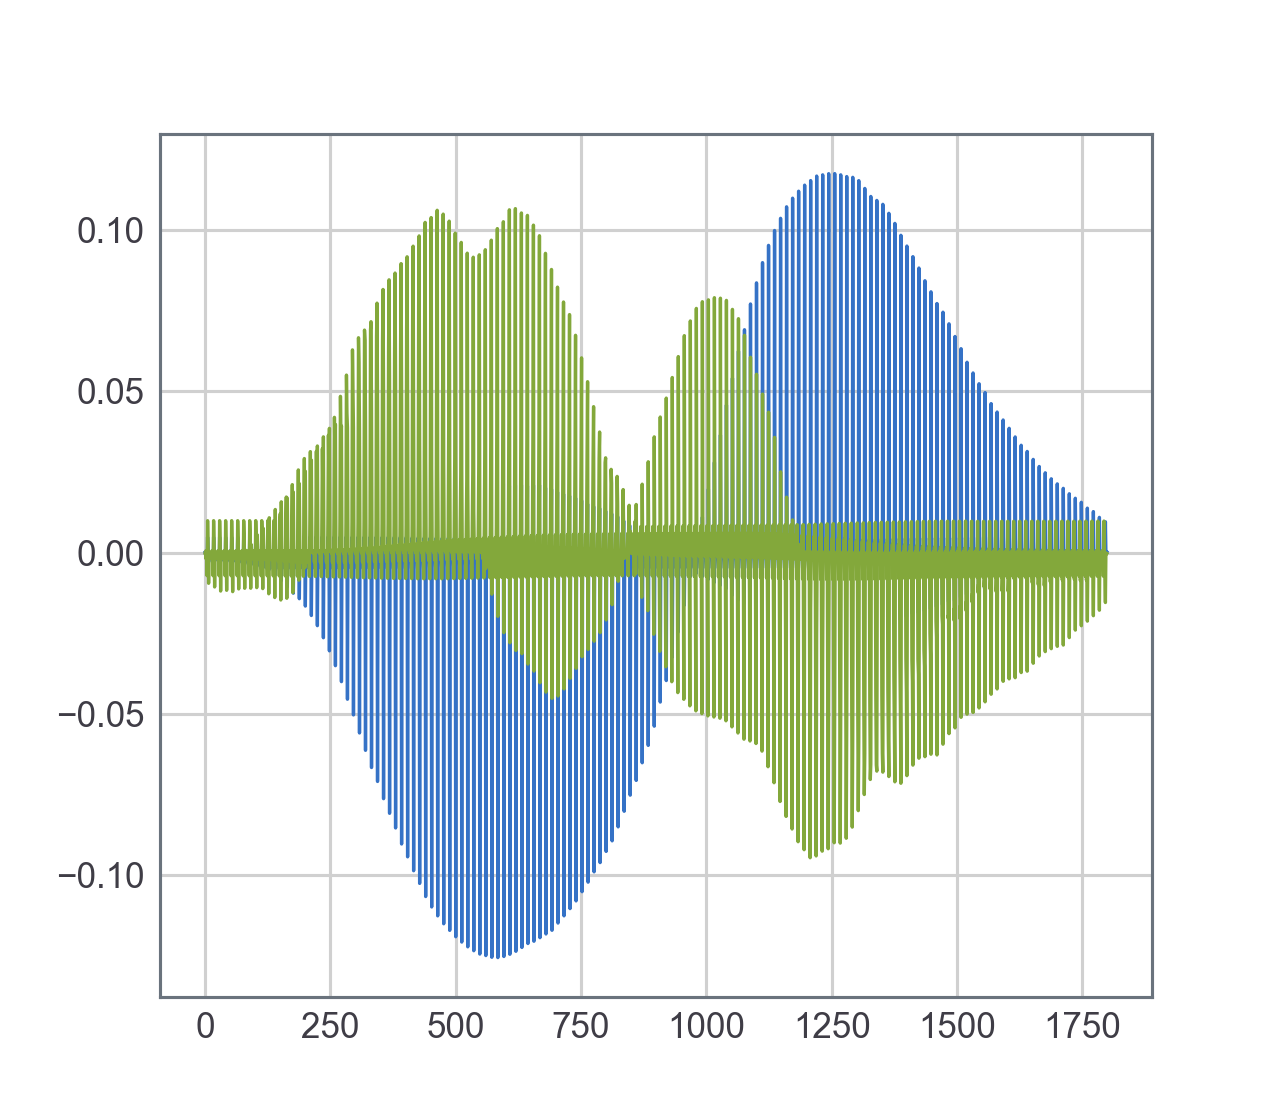

/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [20]:
plt.close()
plt.plot(np.arange(len(vec1)),vec1);
plt.plot(np.arange(len(vec2)),vec2);